In [12]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.datasets import load_iris
import scikitplot as skplt

In [ ]:
!pip install XGboost

In [13]:
dataset = load_iris()
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X_train, X_test, y_train, y_test = train_test_split(iris, dataset.target, random_state = 42)

In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

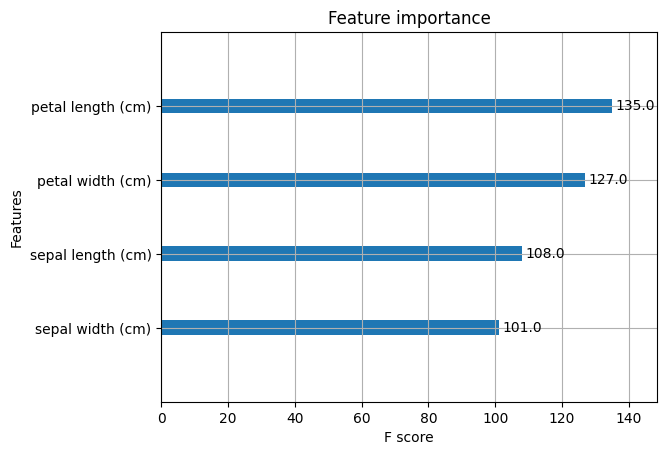

In [15]:
plot_importance(model)

In [16]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

1.0

In [17]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

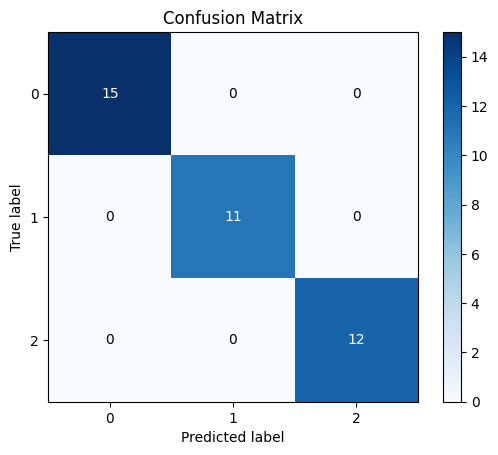

In [18]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("./titanic_train.csv")
df['is_male'] = (df['Sex'] == 'male')
train_columns = ['Pclass', 'Age', 'is_male']
df['Age'] = df['Age'].fillna(df['Age'].mean())

X_train, X_test, y_train, y_test = train_test_split(df[train_columns], df['Survived'], test_size = 0.25, random_state = 32)

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4, random_state = 32)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=32, ...)

In [22]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7937219730941704

In [26]:
from xgboost import DMatrix, cv, plot_tree,  XGBClassifier, XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("boston_house.csv")

X = df.drop('Target', axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [28]:
xgb_reg = XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

xgb_reg.fit(X_train, y_train)

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [29]:
preds = xgb_reg.predict(X_test)
print("정확도 : ", xgb_reg.score(X_test, y_test))

정확도 :  0.4801681785446874


In [30]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE : %f" % (rmse))

RMSE : 7.373222


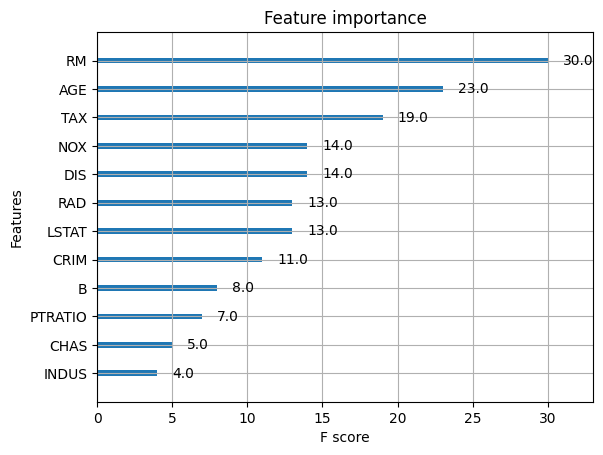

In [31]:
plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()